# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model

In [2]:
%%time
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# From Keras library import- module prepocessing- sub module image & then import ImageDataGenerator class
#or-from tensorflow import keras
#from tensorflow.keras.preprocessing.image import imageDataGenerator

Wall time: 1.96 s


In [3]:
tf.__version__

'2.2.0'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

''' apply some transformation's on training set- so as to avoid overfitting as when we train our Cnn on training set we 
get higher accuracy/variance for train(98) & lower fo test set
#What are these transformation-
1. Geometrical transformations- shift some pixels,rotate a bit,horizontal flips,zoom in/out-Is called image augmentation
so that the cnn model does not overtrained/learned on training images 
Image Augmentation-we will get new images when we train our images.
Three transformations-zoom range,horizontal flip,sheer range ''' 

In [5]:
# Rescale-feature scaling on each feature i.e pixel & dividing their value by 255 as each value of pixel
#lies btw 0-255(Normalization)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# To connect the train_datagen to training set images
# training_set is the name which we give to training set
#From the object we going to call a method of instance 
training_set = train_datagen.flow_from_directory(
        r'C:\Users\KUNAL\Documents\Deep_Learning\dataset\training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')
#parameters of  trainig_set-path,size of image,batch size-how many images,class_mode-output categorical/binary

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
# So here we keep the test set images as original don't apply transformation but apply feature scaling recsale on test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        r'C:\Users\KUNAL\Documents\Deep_Learning\dataset\test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
# create cnn variable as an instance of sequence class helps us to input different layers
cnn=tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
#SO we call object.method- here we conv layer is the sequence of conv2d class same as dense class which helps ups to build 
#fully connected layer from layers module
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
#parameters-filters-FD we need,kernel_size= 3x3 matrix,activation-relu for converting linear to non linear,input shape since it is 
#coloured image so 3d image so we write size,size,3 & for black & white we write size,size,1

### Step 2 - Pooling

In [9]:
# here in add method we call maxpool2d class inside the layer's
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
#parameters-pool_size=2x2 matrix we are taking on the left corner and writing the matched in the max pooled Fm,Strdes=2 
#because we are moving the 2x2 matrix after each 2 rows,padding default is valid -here we ignore the other 2 cells & in
#same we create fake cell which have 0 .

### Adding a second convolutional layer

In [10]:
#In 2nd layer, the kernels span the depth of the output of the previous layer, and pooling is applied per feature map.
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

### Step 3 - Flattening

In [11]:
# We Flatten the whole conv. layer my calling Flatten class from layers module
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
#Units-no of hidden neurons,larger no. of neurons as it is complex
cnn.add(tf.keras.layers.Dense(units=126,activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# sigmoid for binary & softmax for 

In [14]:
    cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 126)               790398    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Metrics=accuracy,probablistic,auc/roc,regression
#losses/cost fn-binary/categorical_crossentropy for classification & meansquarederror for regression losses

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
# here we train our cnn on train set by fit method and on same time evaluating on test set
cnn.fit(x = training_set, validation_data = test_set,epochs = 25)
                 

Epoch 1/25
250/250 [==============================] - 310s 1s/step - loss: 0.6797 - accuracy: 0.5631 - val_loss: 0.6249 - val_accuracy: 0.6665
Epoch 2/25
250/250 [==============================] - 180s 720ms/step - loss: 0.6022 - accuracy: 0.6783 - val_loss: 0.5584 - val_accuracy: 0.7245
Epoch 3/25
250/250 [==============================] - 117s 470ms/step - loss: 0.5540 - accuracy: 0.7168 - val_loss: 0.5475 - val_accuracy: 0.7275
Epoch 4/25
250/250 [==============================] - 123s 491ms/step - loss: 0.5196 - accuracy: 0.7402 - val_loss: 0.5466 - val_accuracy: 0.7285
Epoch 5/25
250/250 [==============================] - 227s 907ms/step - loss: 0.4925 - accuracy: 0.7584 - val_loss: 0.4851 - val_accuracy: 0.7700
Epoch 6/25
250/250 [==============================] - 264s 1s/step - loss: 0.4742 - accuracy: 0.7722 - val_loss: 0.4836 - val_accuracy: 0.7755
Epoch 7/25
250/250 [==============================] - 176s 705ms/step - loss: 0.4665 - accuracy: 0.7771 - val_loss: 0.4819 - val_a

In [17]:
tf.keras.models.save_model(cnn,'my_model2.hdf5')

# Plot Loss & Accuracy

In [22]:
history = cnn.history.history

In [23]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [24]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

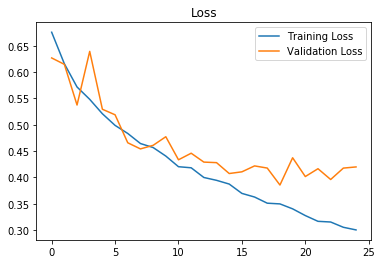

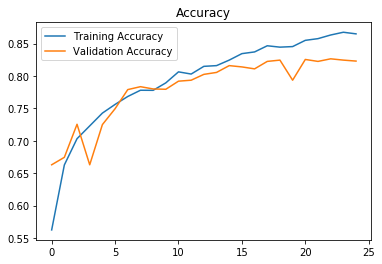

In [30]:
plot_metrics(history)

# Result


Let's experiment with the best model (the one with the best validation accuracy):

Concretely, the model at the 23rd iteration with validation accuracy of 82.65%

# Load Best Model

In [25]:
from tensorflow.keras.models import Model, load_model

In [ ]:

best_model.metrics_names

In [ ]:
best_model = load_model(filepath='models/cnn-parameters-improvement-23-0.91.model')
tf.keras.models.save_model(cnn,'my_model2.hdf5')

In [ ]:
# Evaluating our best model on Test Data
loss, acc = best_model.evaluate(x=X_test, y=y_test)

# Accuracy of the best model on the testing data:

In [ ]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {acc}")

## Part 4 - Making a single prediction

dog


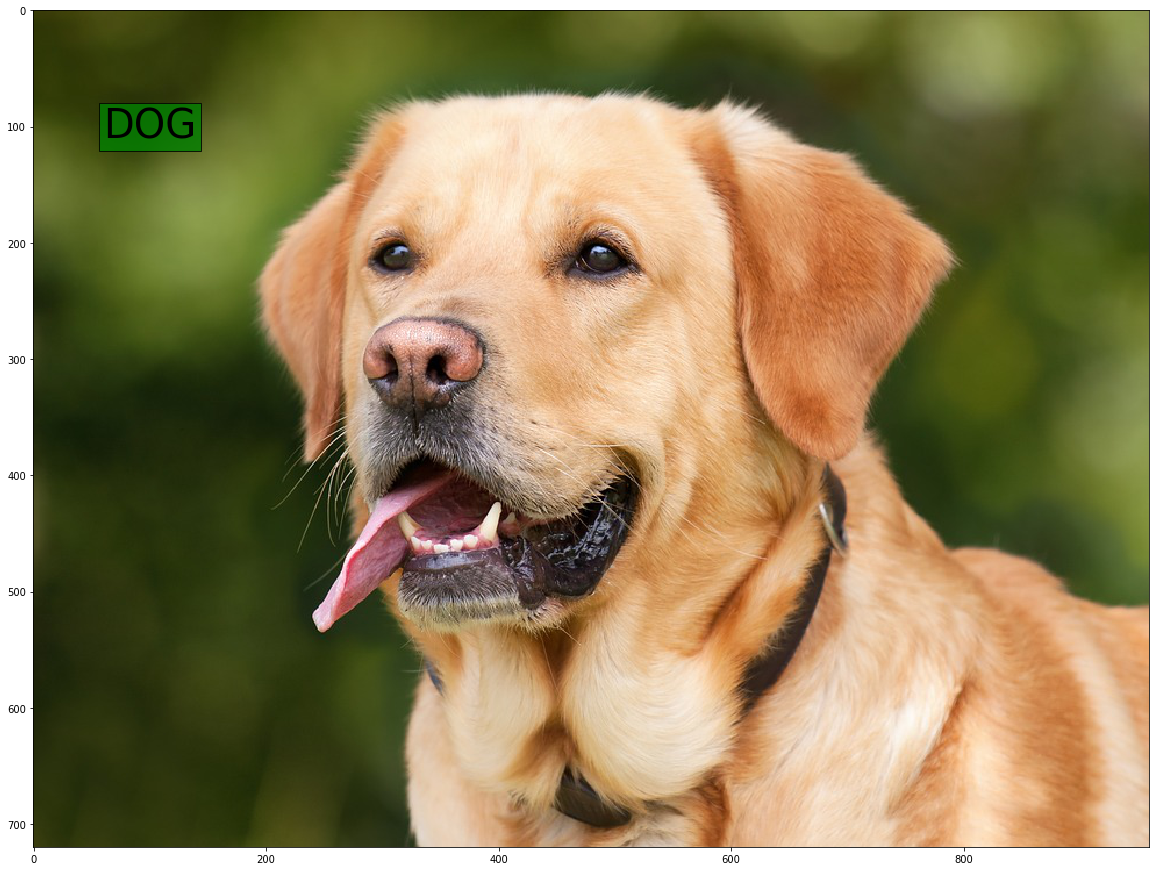

In [28]:
# we import image from image Data Preprocessing & then image image object calls 1.)load_img fn-specify the path and load it.
#2.) to be accepted by predict method we need to convert Pil image into numpy array by img_to_array fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
test_image=image.load_img(r'C:\Users\KUNAL\Documents\Deep_Learning\dataset\single_prediction\cat_or_dog_1.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
# so as to increase dimension for the batches i.e it can take other images too
test_image=np.expand_dims(test_image,axis=0)
# axis=0 the dimensions fake we are adding will be 1 dimension to batch
result=cnn.predict(test_image)
training_set.class_indices
if result[0][0]==1:
    print('dog')
    img1=mpimg.imread(r'C:\Users\KUNAL\Documents\Deep_Learning\dataset\single_prediction\cat_or_dog_1.jpg')
    plt.figure(figsize=(20,40))
    plt.imshow(img1)
    plt.text(100,100,'DOG',size=40,color='black',ha="center",va="center",bbox=dict(facecolor='green', alpha=0.8))# alpha for depth of colour,bbbox for building rectangle around text
else:
    print('cat')
    img2=mpimg.imread(r'C:\Users\KUNAL\Documents\Deep_Learning\dataset\single_prediction\cat_or_dog_2.jpg')
    plt.figure(figsize=(20,40))
    plt.imshow(img2)
    plt.text(100,100,'CAT',size=40,color='black',ha="center",va="center",bbox=dict(facecolor='green', alpha=0.8))# alpha for depth of colour,bbbox for building rectangle around text
# batch starts by 0 then inside the batch their is only one image inside it Dog or cat so 0